Intercept (β₀): 0.34690553745928343
Coefficient (β₁): 0.1458111420722831
Residual Sum of Squares (RSS): 33.54189582110755
Coefficient of Determination (R²): 0.051340320211099244


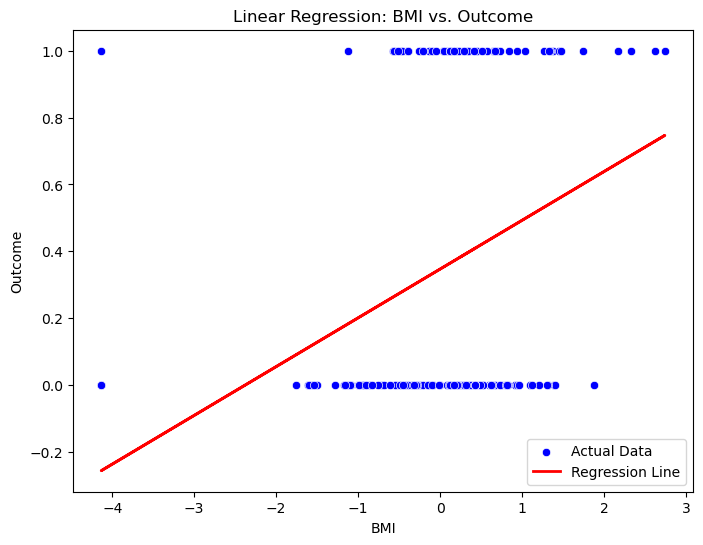

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("./Datasets/diabetes.csv")

# Select features and target
X = data[['BMI']]  # Independent variable
y = data['Outcome']  # Dependent variable (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the feature for better performance (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the model coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate residual sum of squares (RSS)
rss = ((y_test - y_pred) ** 2).sum()

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Intercept (β₀): {intercept}")
print(f"Coefficient (β₁): {coefficient}")
print(f"Residual Sum of Squares (RSS): {rss}")
print(f"Coefficient of Determination (R²): {r2}")

# Plotting the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.flatten(), y=y_test, color='blue', label='Actual Data')
plt.plot(X_test.flatten(), y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('Linear Regression: BMI vs. Outcome')
plt.legend()
plt.show()
